In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the DataSet

In [2]:
# rain_data = pd.read_csv('https://raw.github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv')
rain_data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
rain_data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
rain_data.shape

(8425, 23)

*So we are getting information as follows -

A) Number of Rows = 8425

B) Number of Columns = 23 *

In [4]:
column = rain_data.columns
print(column)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [5]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [6]:
corr = rain_data.corr()
display (corr) 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


*Observations :*

1) Total Number of Columns : 2

2) Number of Float datatype columns : 16

3) Number of Object datatype columns : 7

In [7]:
# Checking for null values present in our Dataset

rain_data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

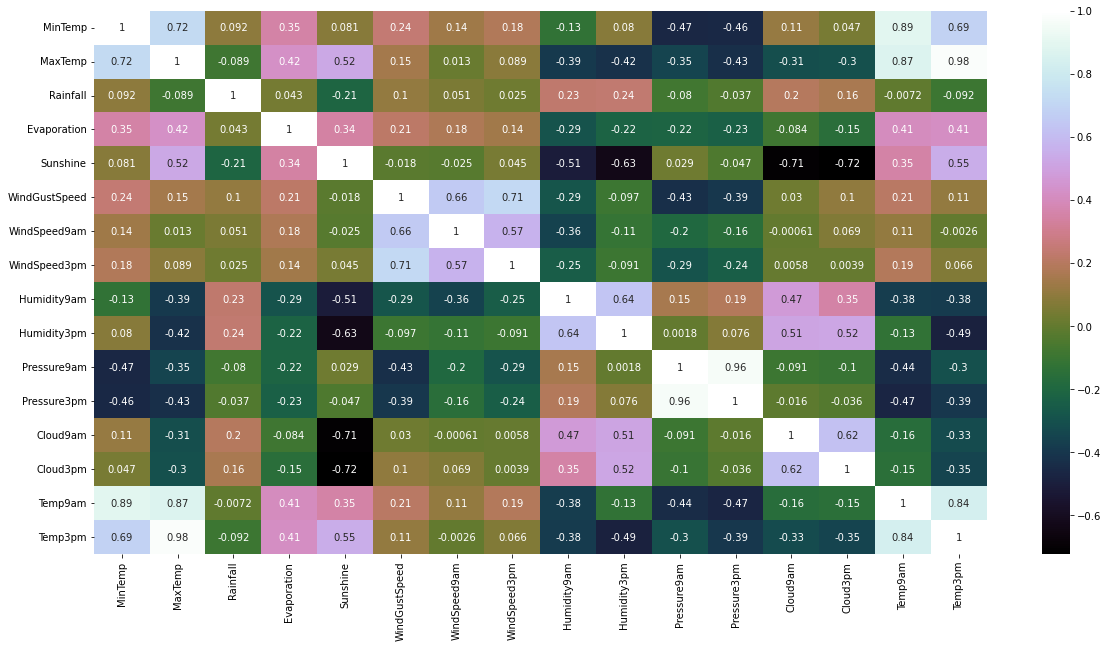

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='cubehelix',annot = True)
plt.show()


In [9]:
data = rain_data.copy()

In [10]:
# Handling Null values for Categorical columns.

cat_col = data.select_dtypes(include=['object']).columns
print(cat_col)

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [11]:
# Using mode imputation to handle null values in Categorical Values.

for i in cat_col :
  data[i] = data[i].fillna(data[i].mode()[0])

In [12]:
# Handling Null Values for Numerical Columns.

num_col = data.select_dtypes(include=['float']).columns
print(num_col)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


In [13]:
# Implementing Mode imputation to handle null values in numerical columns.

for i in num_col :
  data[i] = data[i].fillna(data[i].mean())

In [14]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [15]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No


In [16]:
corr = data.corr()
display (corr) 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.717522,0.087684,0.254965,0.056184,0.230058,0.136872,0.178349,-0.130731,0.079048,-0.429432,-0.422991,0.091604,0.038414,0.887119,0.685520
MaxTemp,0.717522,1.000000,-0.087451,0.322405,0.378403,0.139998,0.013314,0.088172,-0.390976,-0.421879,-0.325721,-0.403258,-0.253968,-0.250132,0.866039,0.974506
Rainfall,0.087684,-0.087451,1.000000,0.023517,-0.169432,0.086000,0.050631,0.024791,0.228800,0.235444,-0.072668,-0.033649,0.185444,0.150760,-0.007083,-0.090687
Evaporation,0.254965,0.322405,0.023517,1.000000,0.226001,0.136371,0.104294,0.101126,-0.213108,-0.161661,-0.177786,-0.189558,-0.062283,-0.108022,0.305264,0.315109
Sunshine,0.056184,0.378403,-0.169432,0.226001,1.000000,-0.013778,-0.018069,0.030145,-0.360831,-0.440268,0.021887,-0.035863,-0.533391,-0.547304,0.250640,0.395324
WindGustSpeed,0.230058,0.139998,0.086000,0.136371,-0.013778,1.000000,0.600198,0.634939,-0.269593,-0.091860,-0.407139,-0.372651,0.023313,0.078631,0.202298,0.102199
WindSpeed9am,0.136872,0.013314,0.050631,0.104294,-0.018069,0.600198,1.000000,0.560660,-0.358391,-0.110587,-0.174679,-0.138454,-0.000549,0.058198,0.109798,-0.002606
WindSpeed3pm,0.178349,0.088172,0.024791,0.101126,0.030145,0.634939,0.560660,1.000000,-0.250953,-0.091004,-0.251697,-0.207544,0.005061,0.003295,0.184188,0.066087
Humidity9am,-0.130731,-0.390976,0.228800,-0.213108,-0.360831,-0.269593,-0.358391,-0.250953,1.000000,0.633291,0.142374,0.173415,0.404742,0.296862,-0.378344,-0.382401
Humidity3pm,0.079048,-0.421879,0.235444,-0.161661,-0.440268,-0.091860,-0.110587,-0.091004,0.633291,1.000000,0.001629,0.070369,0.424348,0.439965,-0.130414,-0.491485


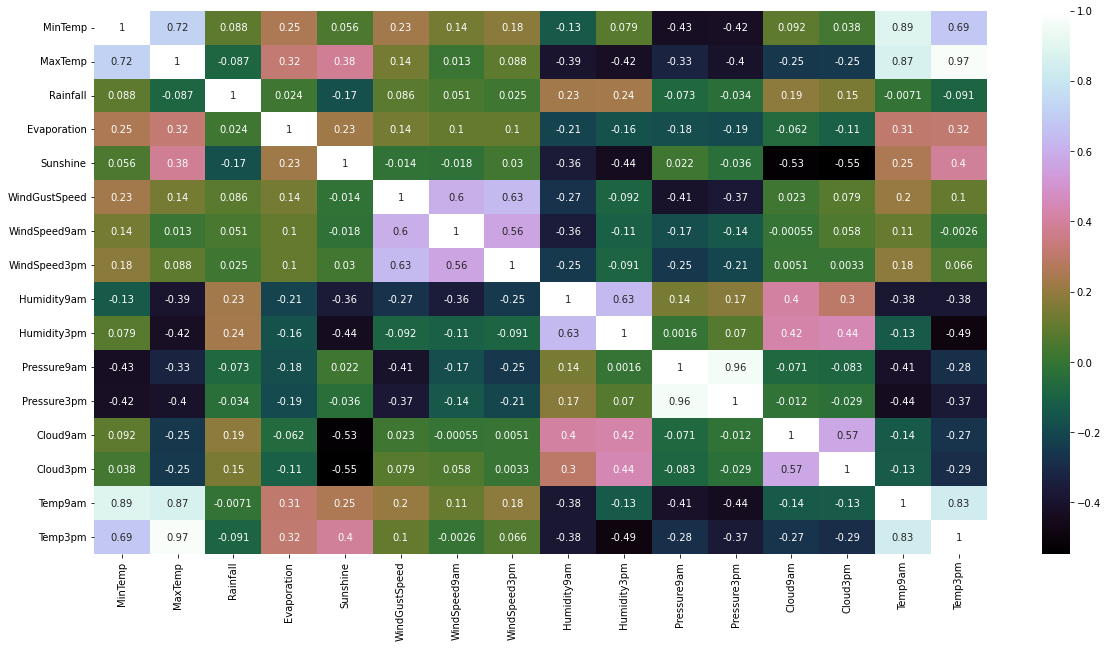

In [17]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='cubehelix',annot = True)
plt.show()

*Here , We can say that there is no null values present in our dataset.*

In [18]:
# converting Date columns

data['Day'] = data['Date'].str.split('-').str[2]
data['Month'] = data['Date'].str.split('-').str[1]
data['Year'] = data['Date'].str.split('-').str[0]

In [19]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,5.389395,7.632205,W,44.0,W,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,01,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,5.389395,7.632205,WNW,44.0,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,02,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,5.389395,7.632205,WSW,46.0,W,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,03,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,5.389395,7.632205,NE,24.0,SE,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,04,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,5.389395,7.632205,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,05,12,2008


In [20]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [21]:
# Converting datatype for newly created feature

data['Day'] = data['Day'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)

In [22]:
data.nunique()

Date             3004
Location           12
MinTemp           286
MaxTemp           332
Rainfall          251
Evaporation       117
Sunshine          141
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       36
Humidity9am        91
Humidity3pm        95
Pressure9am       385
Pressure3pm       375
Cloud9am           10
Cloud3pm           10
Temp9am           305
Temp3pm           329
RainToday           2
RainTomorrow        2
Day                31
Month              12
Year               10
dtype: int64

*Almost all columns have unique values.*

In [23]:
data['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

# ***EDA : EXPLORATORY DATA ANALYSIS***

# *Uni-Variate Analysis*

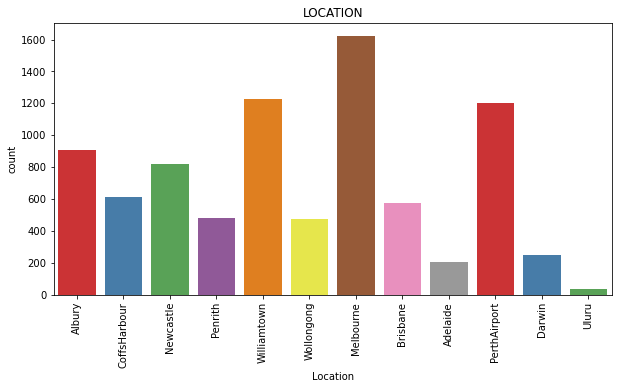

In [24]:
# Visualizing 'Location' column by using countplot.

plt.figure(figsize = (10 , 5))
sns.countplot(x = data['Location'] , palette = 'Set1')
plt.title("LOCATION")
plt.xticks(rotation = 90)
plt.show()

*High Rainfall is predicted for 'Mellbourne'location then for 'Williamtown' and 'PerthAirport'and lowest is predicted for 'Uluru' , 'Adelaide' then 'Darwin'.*

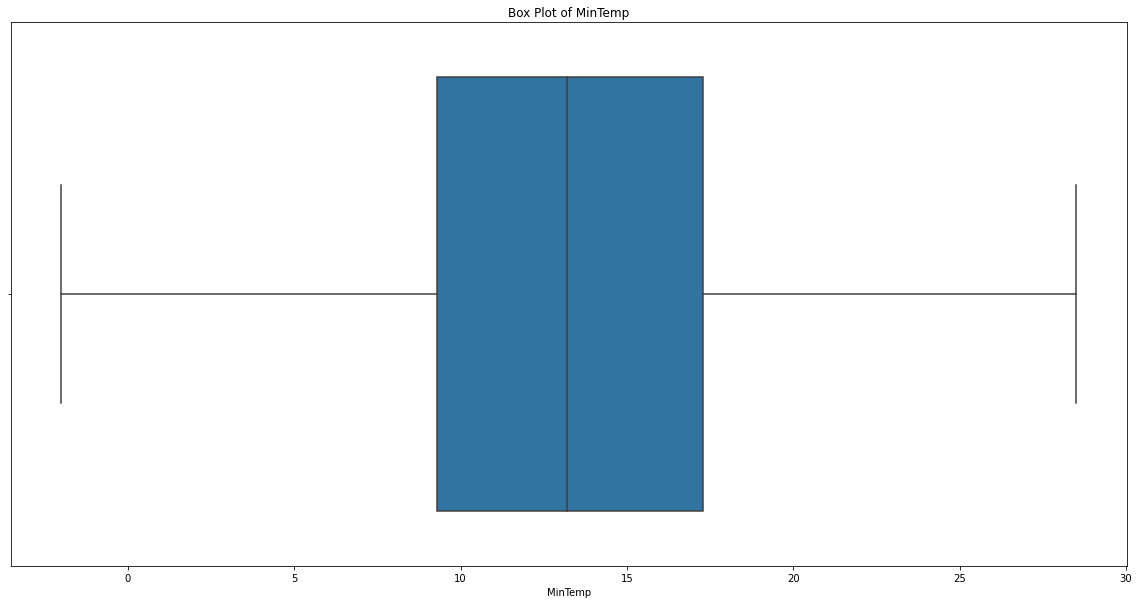

In [25]:
sns.boxplot(x=data['MinTemp'])
plt.xlabel('MinTemp')
plt.title('Box Plot of MinTemp')
plt.show()

<AxesSubplot:xlabel='MinTemp', ylabel='Density'>

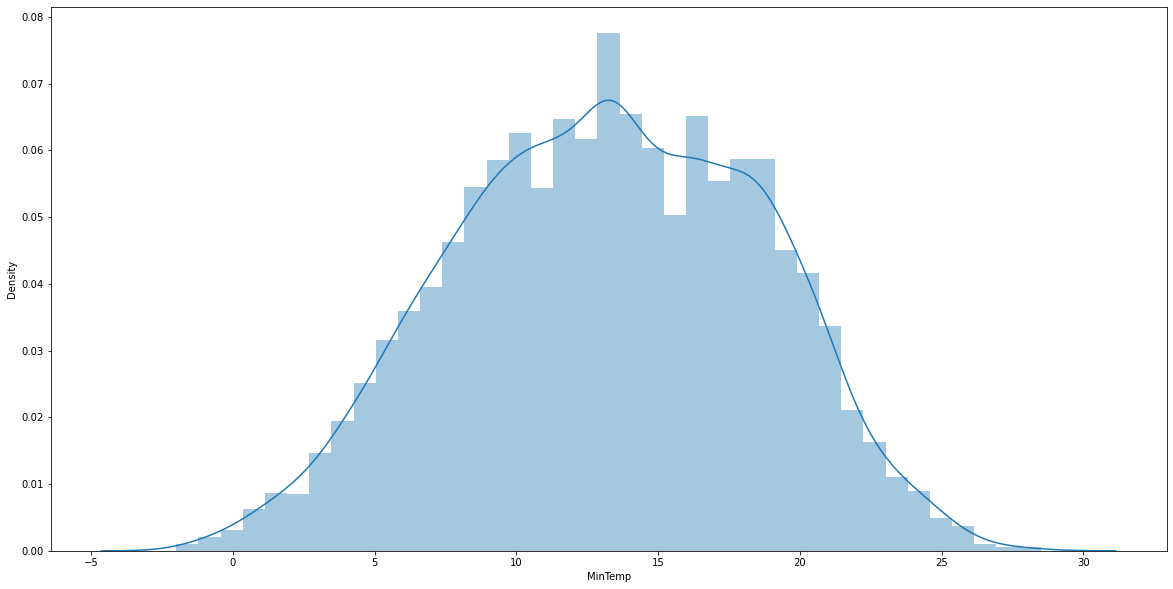

In [26]:
# VIsualizing 'MinTemp' column distplot.

import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['MinTemp'])

*MinTemp column shows normal curve having range 5 to 20.*

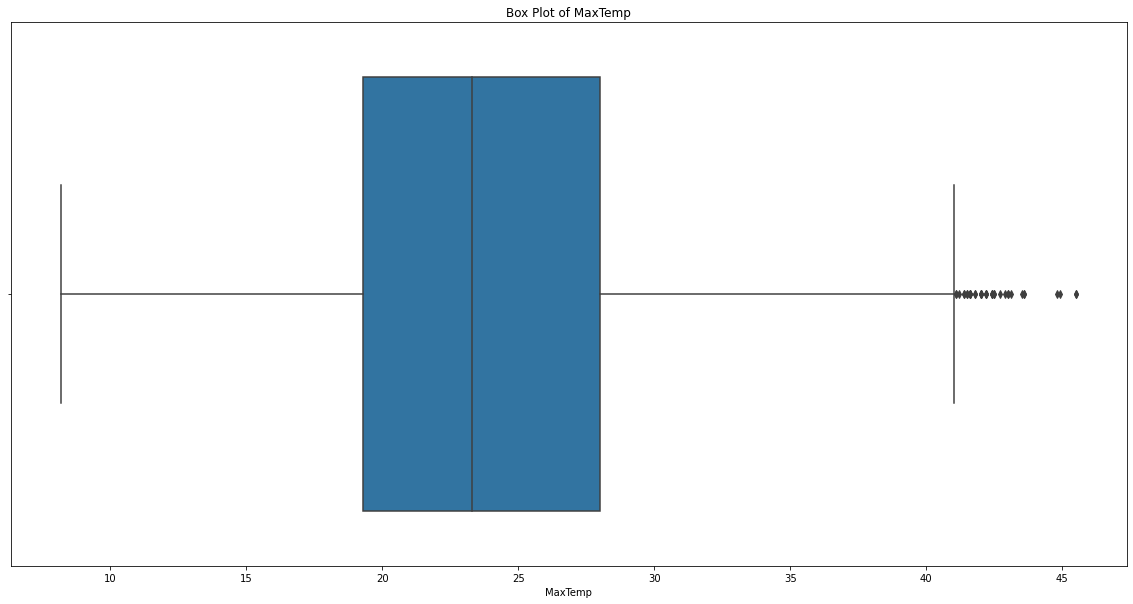

In [27]:
sns.boxplot(x=data['MaxTemp'])
plt.xlabel('MaxTemp')
plt.title('Box Plot of MaxTemp')
plt.show()


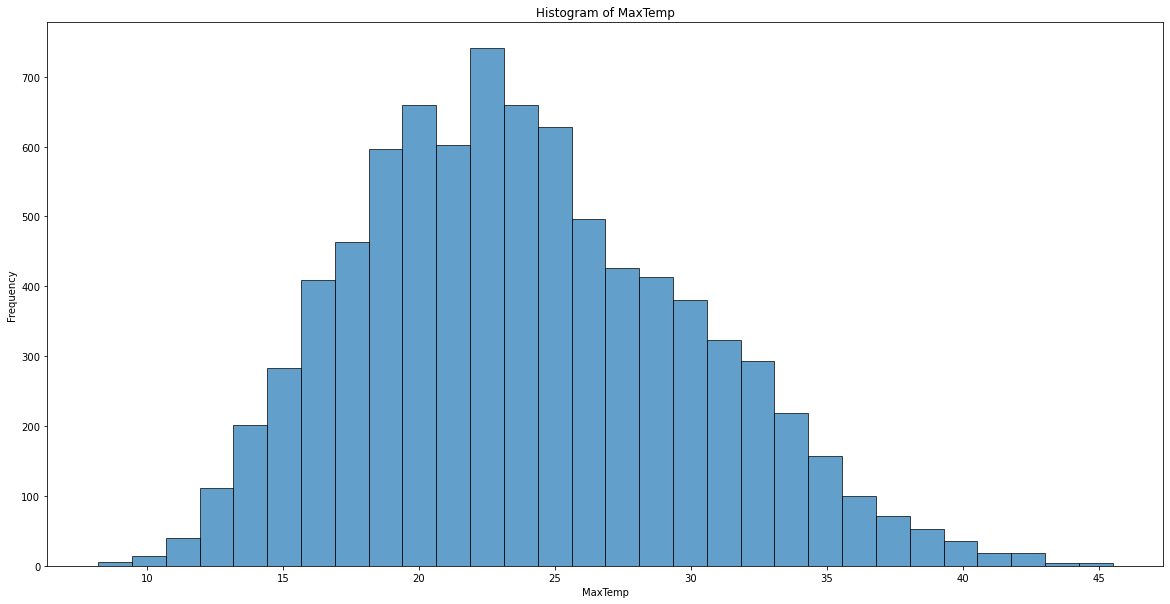

In [28]:
import matplotlib.pyplot as plt

plt.hist(data['MaxTemp'], bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.title('Histogram of MaxTemp')
plt.show()


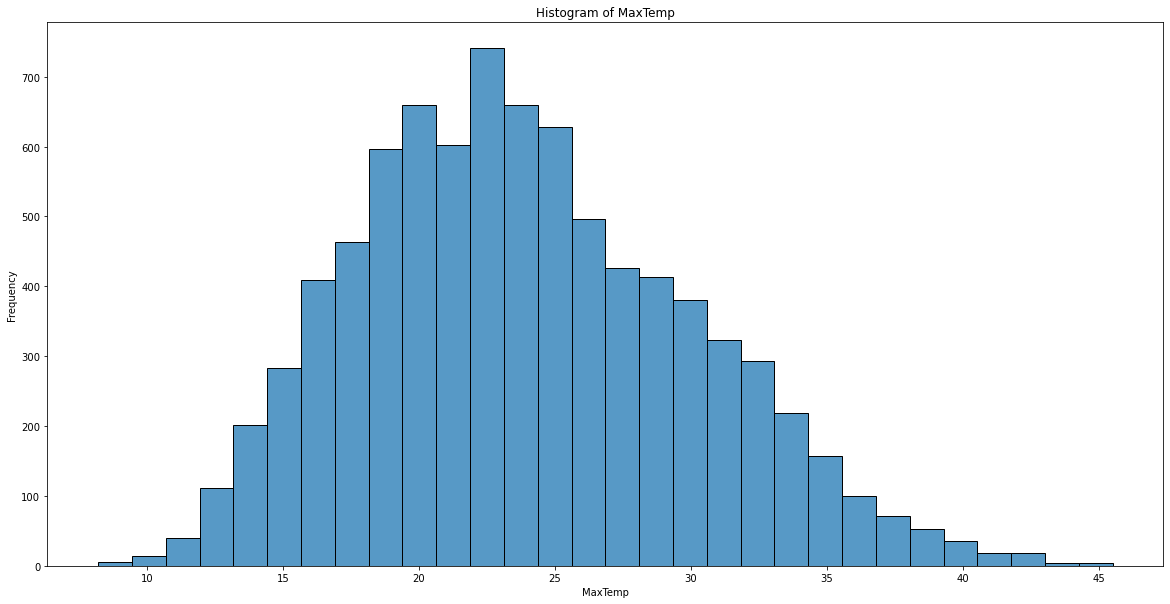

In [29]:
import seaborn as sns

sns.histplot(data['MaxTemp'], bins=30, kde=False)
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.title('Histogram of MaxTemp')
plt.show()


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

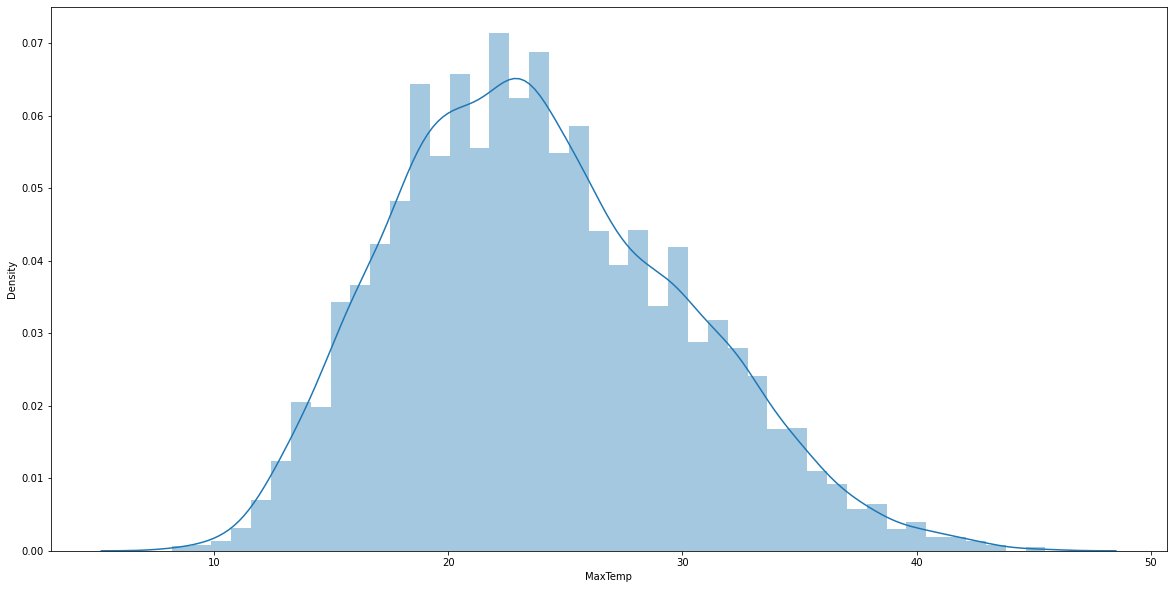

In [30]:
# Visualizing 'MaxTemp' column using distplot.

sns.distplot(data['MaxTemp'])

*MinTemp column shows normal curve having range 20 to 30.*

<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

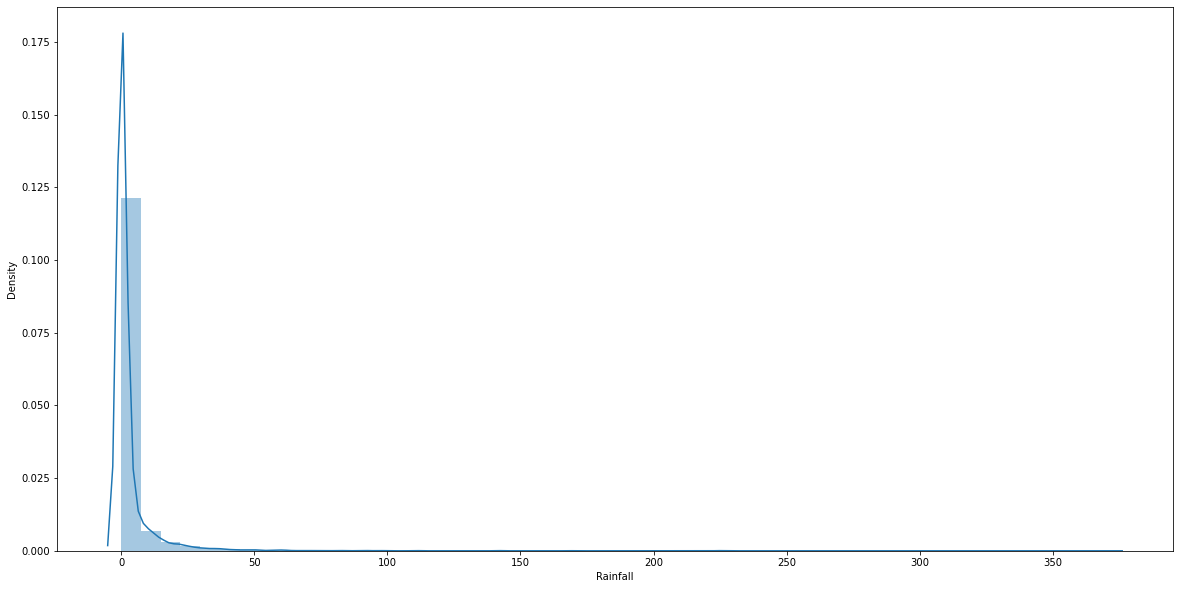

In [31]:
# Visualizing 'Rainfall' Column by using Distplot.

sns.distplot(data['Rainfall'])

*Here , 'Rainfall' column shows most of the data points are concentrated near zero that means the column contains skewness.*

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

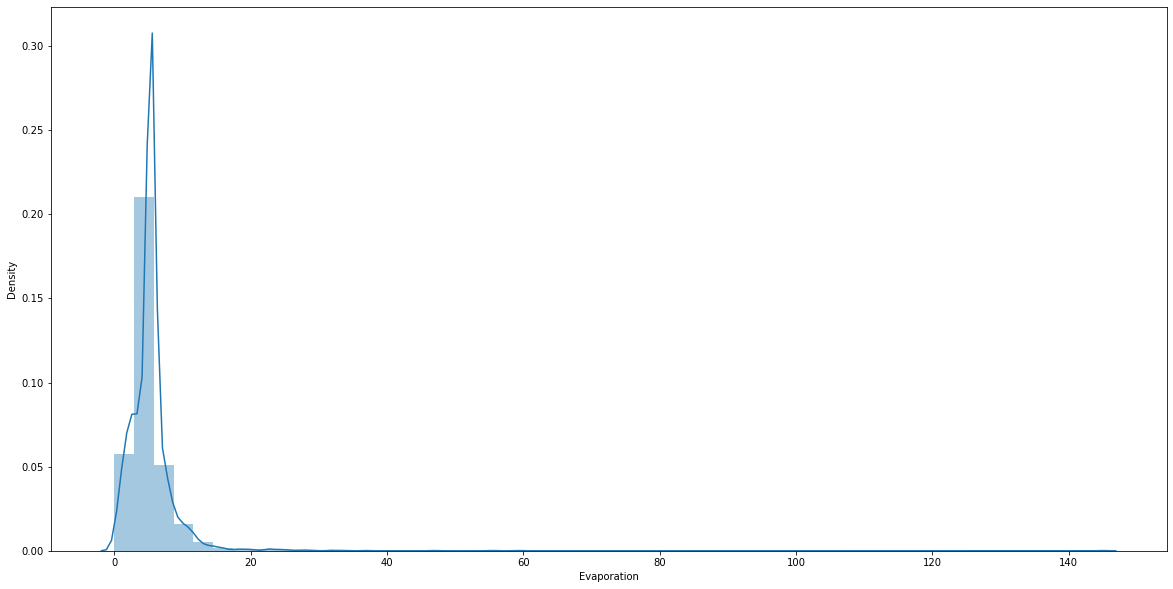

In [32]:
#Visualizing 'Evaporation' column by using Distplot.

sns.distplot(data['Evaporation'])

*Here, 'Evaporation' column also shows that most of the values lies near zero and it shows skewness.*

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

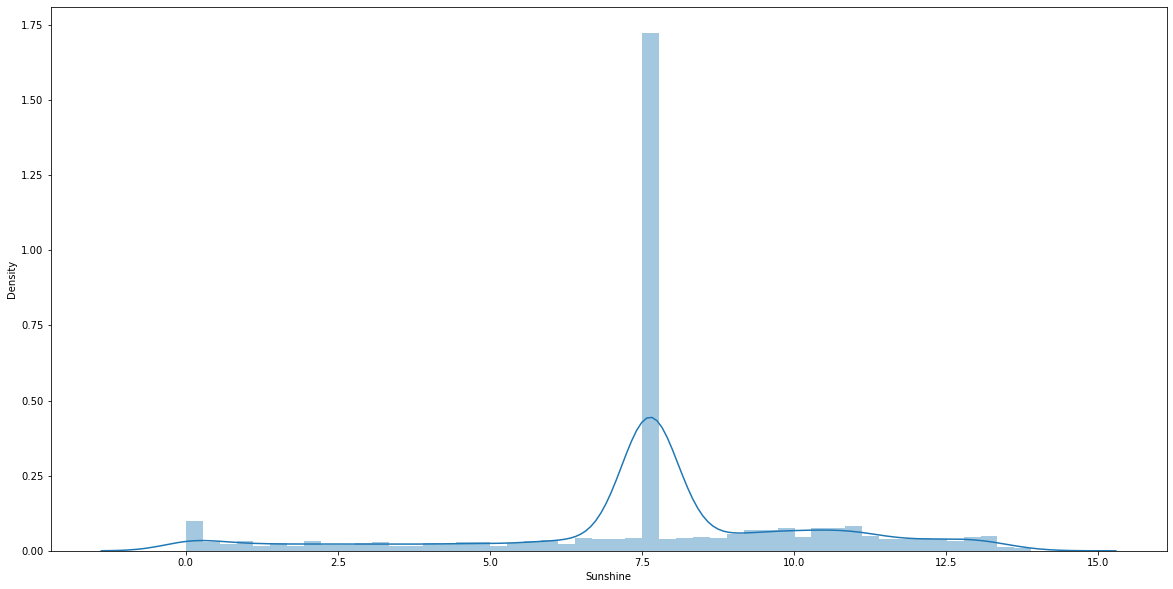

In [33]:
# Visualizing "Sunshine" column by using Distplot.
sns.distplot(data['Sunshine'])

*Here, 'Sunshine' column shows a small normal curve with median at 7.5.*

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Density'>

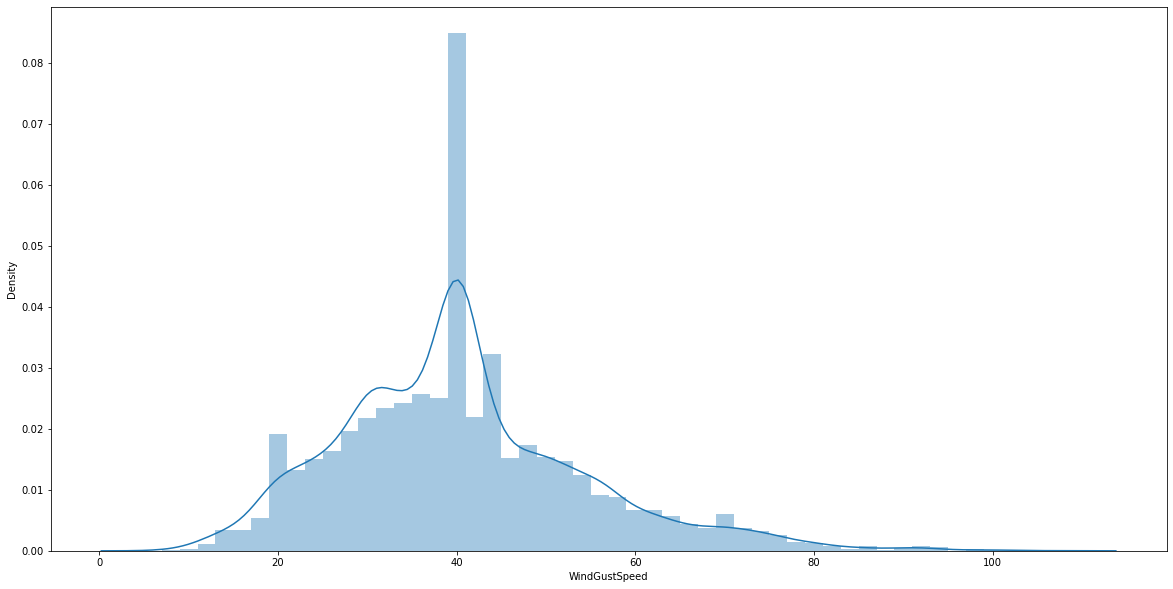

In [34]:
# Visualizing 'WindGustSpeed' column by using distplot.
sns.distplot(data['WindGustSpeed'])

*Here , 'WindGustSpeed' columns shows somewhat normal trend but little bit skewness with range 20-60.*

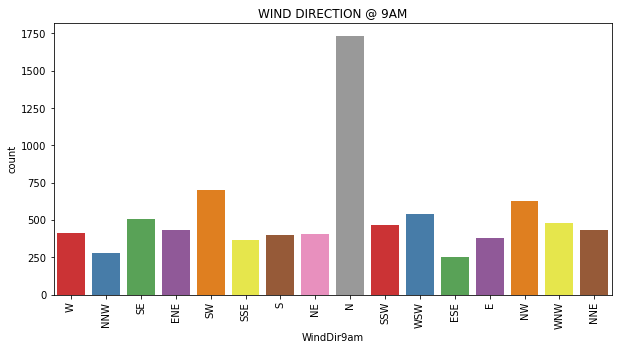

In [35]:
plt.figure(figsize = (10 ,5))
sns.countplot(x = data['WindDir9am'] , palette = 'Set1')
plt.xticks(rotation = 90)
plt.title("WIND DIRECTION @ 9AM")
plt.show()

*Here , 'WindDir9am' column shows wind speed is mostly in North direction and less in ESE and NNW at 9 am.
*

In [36]:
print(data['WindDir9am'].unique())
print(data['WindSpeed3pm'].unique())

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
[24.         22.         26.          9.         20.         17.
 28.         11.          6.         13.         30.         19.
 31.          7.         15.         48.          4.         33.
  0.          2.         18.53366194 37.         46.         39.
 50.         35.         41.         44.         43.         65.
 56.         83.         54.         61.         57.         52.        ]


[]

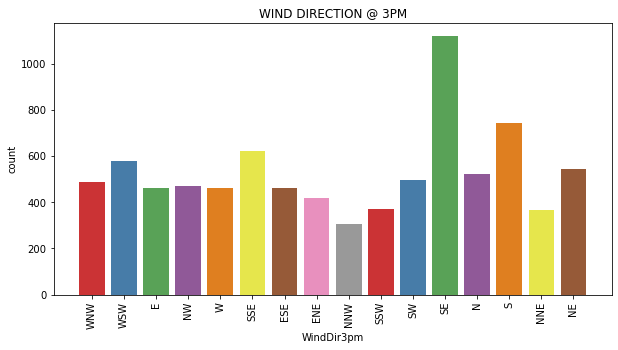

In [37]:
plt.figure(figsize=(10 , 5))
sns.countplot(x= data['WindDir3pm'] , palette = 'Set1')
plt.xticks(rotation = 90)
plt.title("WIND DIRECTION @ 3PM")
plt.plot()

*Here , 'WindDir3pm' column shows wind direction is mostly SE & S and less in NNW , & SSW.
*

<AxesSubplot:xlabel='Humidity9am', ylabel='Density'>

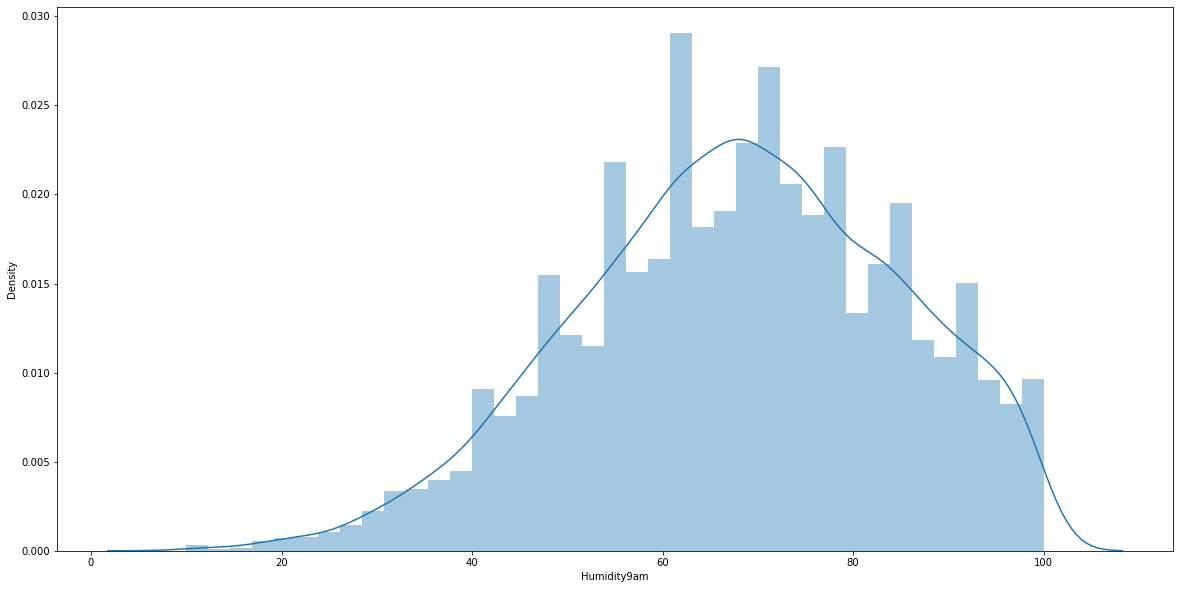

In [38]:
sns.distplot(data['Humidity9am'])

*Here , 'Humidity9am' column shows somewhat skewness with range 40-80 at 9AM*

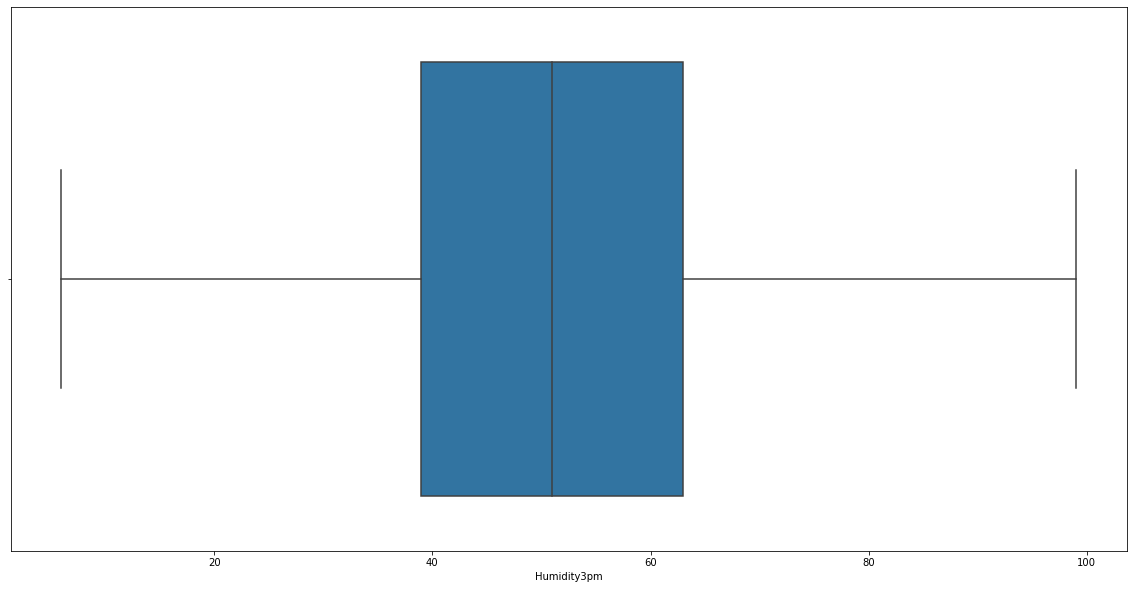

In [39]:
sns.boxplot(x = data['Humidity3pm'])
plt.xlabel("Humidity3pm")
plt.show()

<AxesSubplot:xlabel='Humidity3pm', ylabel='Density'>

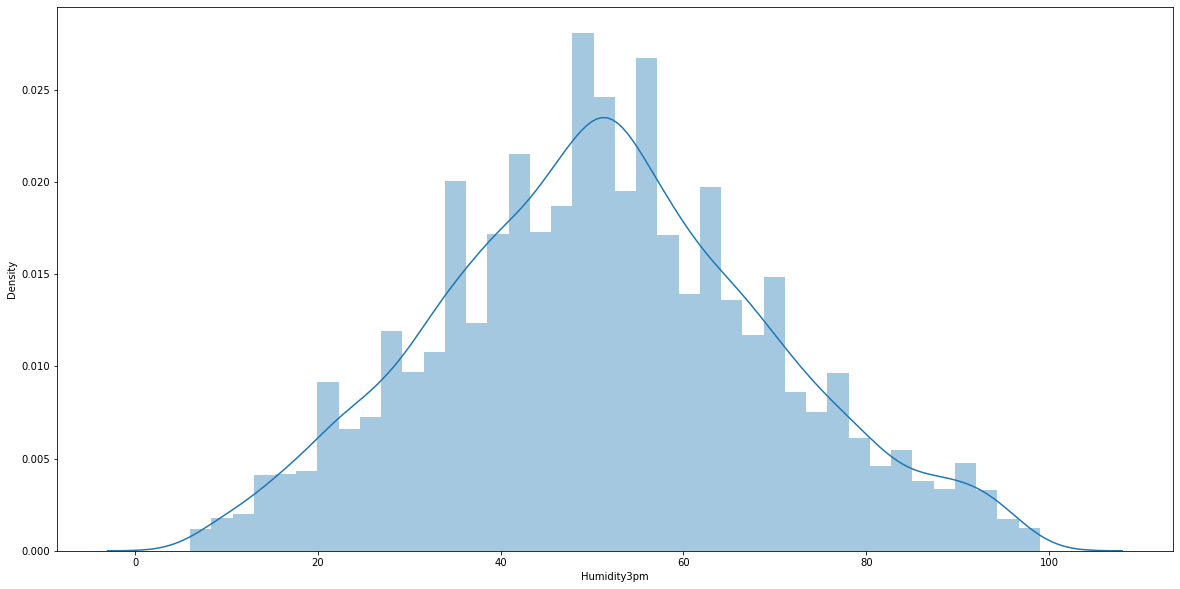

In [40]:
sns.distplot(data['Humidity3pm'])

*Here , 'Humidity3pm' column shows normal curve with most humidity in range 40-80 at 3pm.*

<AxesSubplot:xlabel='Pressure9am', ylabel='Density'>

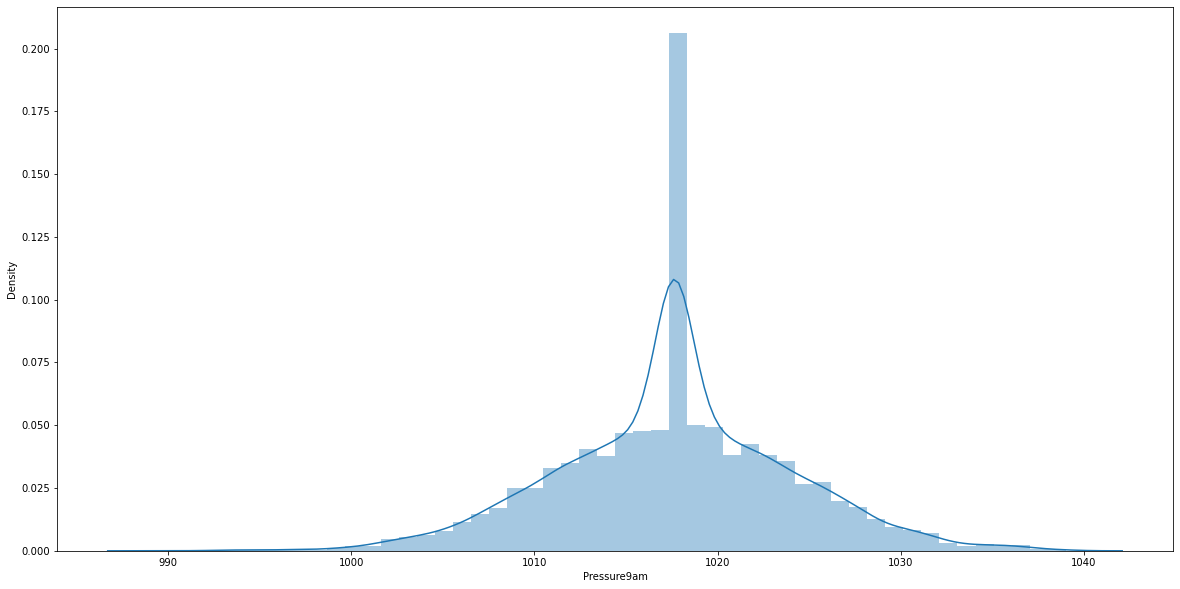

In [41]:
sns.distplot(data['Pressure9am'])

*Here , above plot show that 'Pressure9am' column shows somewhat normal curve between 1010 & 1020.*

<AxesSubplot:xlabel='Pressure3pm', ylabel='Density'>

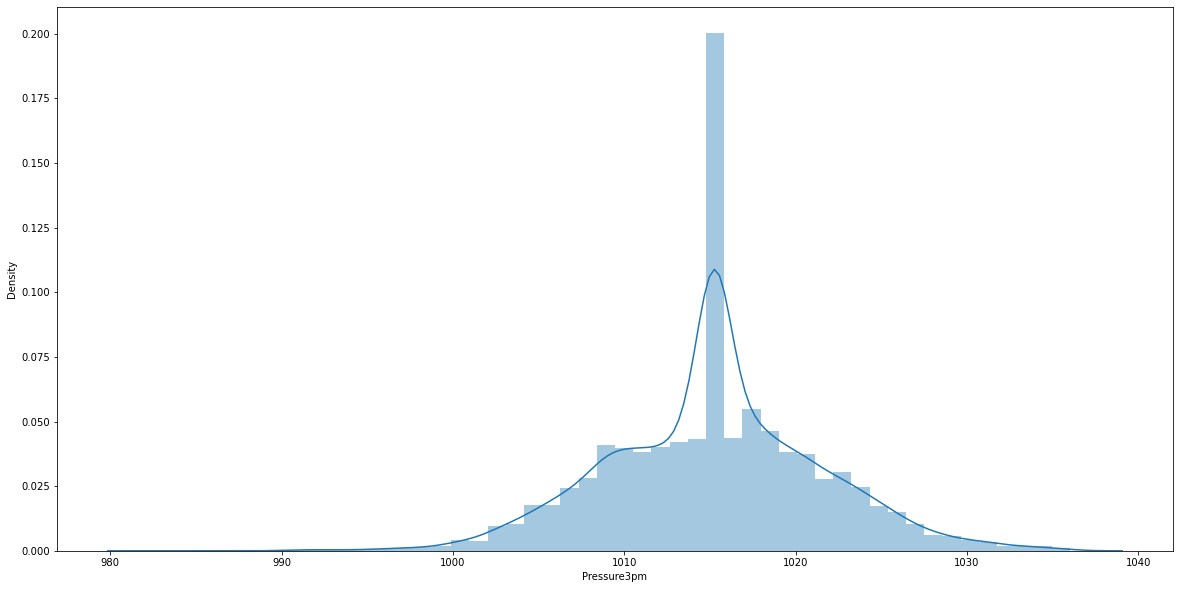

In [42]:
sns.distplot(data['Pressure3pm'])

*As we can see that , 'Pressure3pm' column shows same normal curve as 'Pressure9am'.*

<AxesSubplot:xlabel='Cloud3pm', ylabel='Density'>

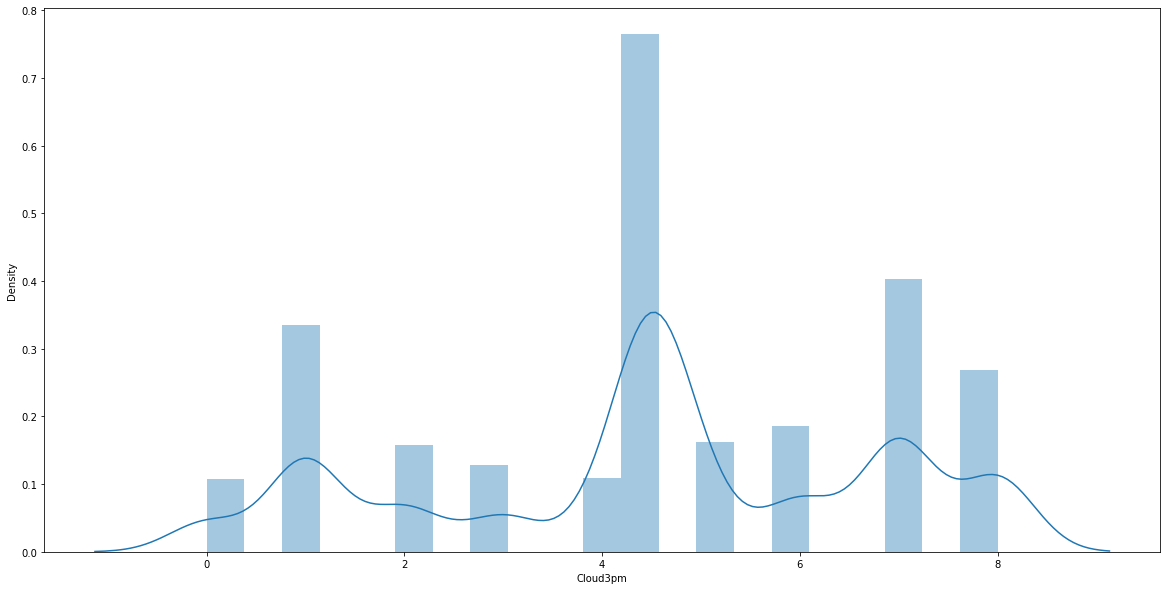

In [43]:
sns.distplot(data['Cloud3pm'])

<AxesSubplot:xlabel='Cloud9am', ylabel='Density'>

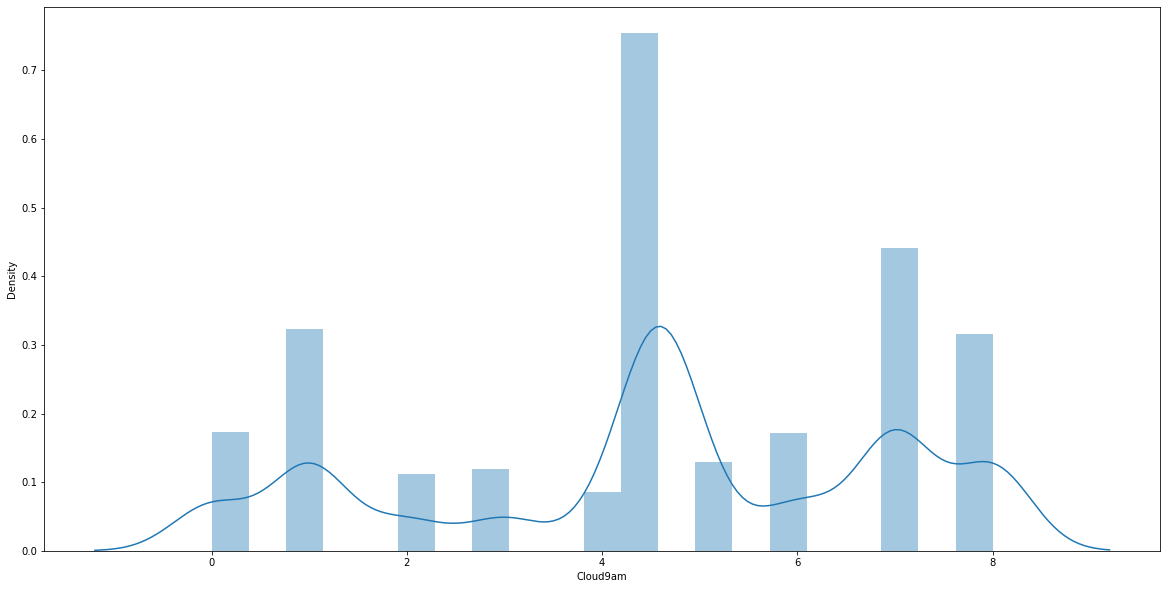

In [44]:
sns.distplot(data['Cloud9am'])

*As we can see that , Both 'Cloud9am' and 'Cloud3pm' shows almost same curve.*

<AxesSubplot:xlabel='Temp9am', ylabel='Density'>

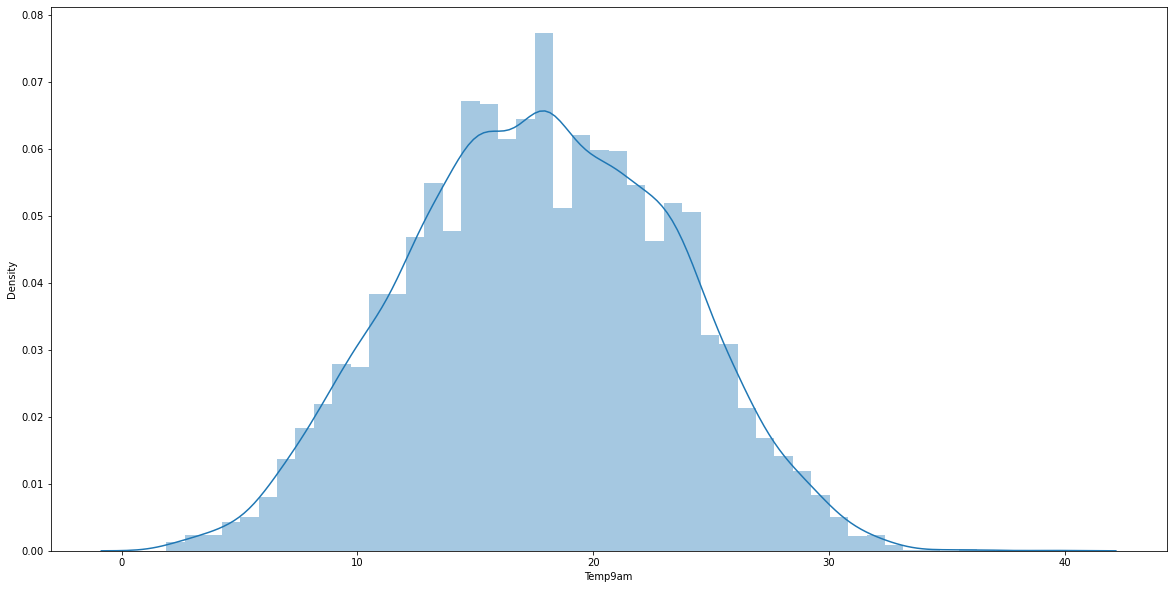

In [45]:
sns.distplot(data['Temp9am'])

<AxesSubplot:xlabel='Temp3pm', ylabel='Density'>

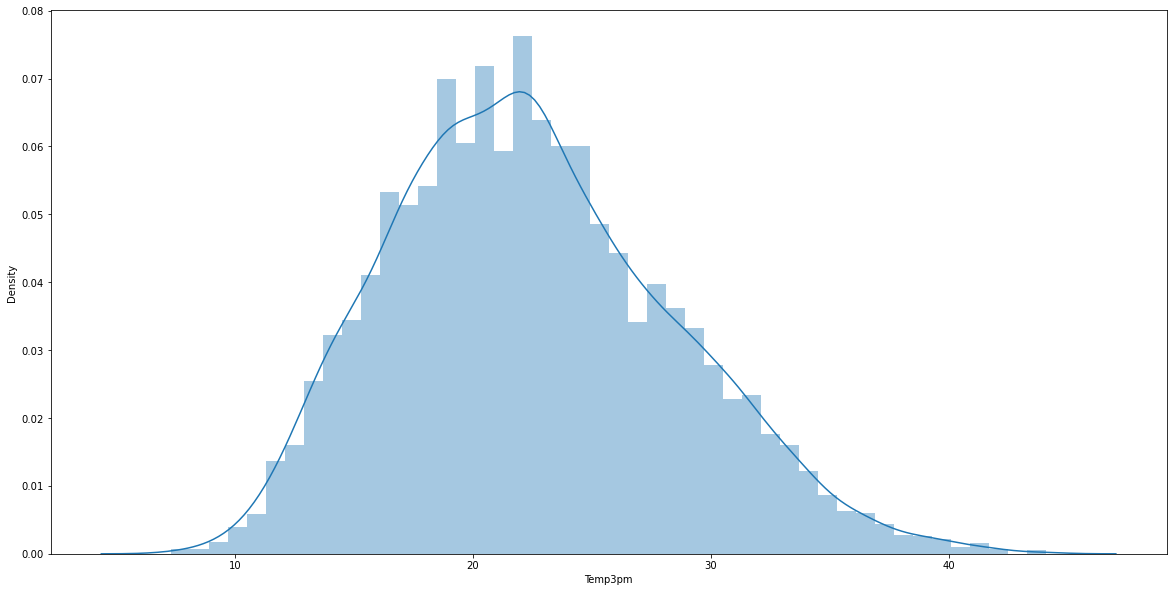

In [46]:
#data.info(['Temp3pm'])
sns.distplot(data['Temp3pm'])

*Here , Both 'Temp9am' and 'Temp3pm' shows perfect normal curve.*

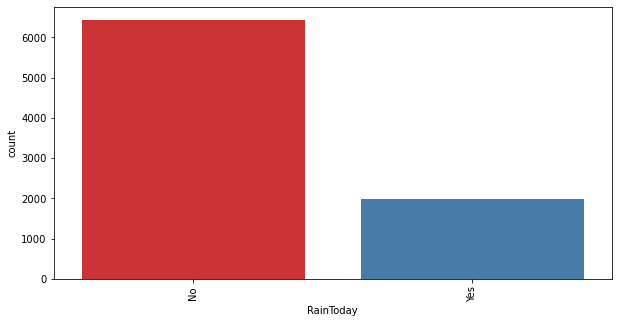

In [47]:
# visualizing 'Raintoday column by using countplot.

plt.figure(figsize = (10 , 5))
sns.countplot(x = data['RainToday'] , palette = 'Set1')
plt.xticks(rotation = 90)
plt.show()

*As we can see that , 'RainToday' column shows mostly no rainfall.*

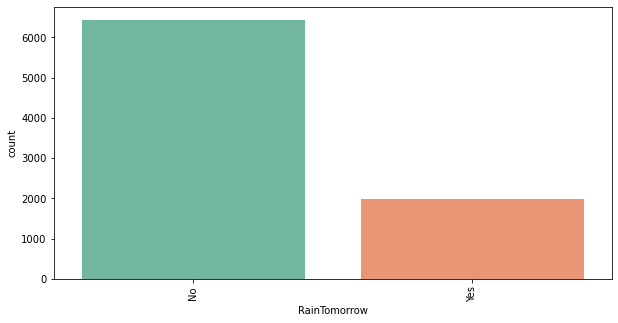

In [48]:
# Visualizing 'RainTomorrow' column by using countplot.

plt.figure(figsize = (10 , 5))
sns.countplot(x = data['RainTomorrow'] , palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

*Here we can see that , 'RainTomorrow' column shows less rainfall in majority.*

We will combine 'WindSpeed9am' and 'WindSpeed3pm','Humidity9am' and 'Humidity3pm', 'Cloud9am' and 'Cloud3pm', 'Temp9am' and 'Temp3pm', 'Pressure9am' and 'Pressure3pm' columns into average of them as they have equal values.

In [49]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [50]:
data['Avg_WindSpeed'] = (data['WindSpeed3pm']+data['WindSpeed9am'])/2
data['Avg_Humidity'] = (data['Humidity3pm']+data['Humidity9am'])/2
data['Avg_Cloud'] = (data['Cloud3pm']+data['Cloud9am'])/2
data['Avg_Temp'] = (data['Temp3pm']+data['Temp9am'])/2
data['Avg_Pressure'] = (data['Pressure3pm']+data['Pressure9am'])/2

In [51]:
# Dropping irrelevant columns
data = data.drop(columns = ['Date' , 'WindSpeed3pm' , 'WindSpeed9am' , 'Humidity3pm' , 'Humidity9am' , 'Cloud3pm' , 'Cloud9am' , 'Temp3pm' , 'Temp9am' , 'Pressure3pm' , 'Pressure9am'])


In [52]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow', 'Day', 'Month', 'Year', 'Avg_WindSpeed', 'Avg_Humidity',
       'Avg_Cloud', 'Avg_Temp', 'Avg_Pressure'],
      dtype='object')

<AxesSubplot:xlabel='Avg_WindSpeed', ylabel='Density'>

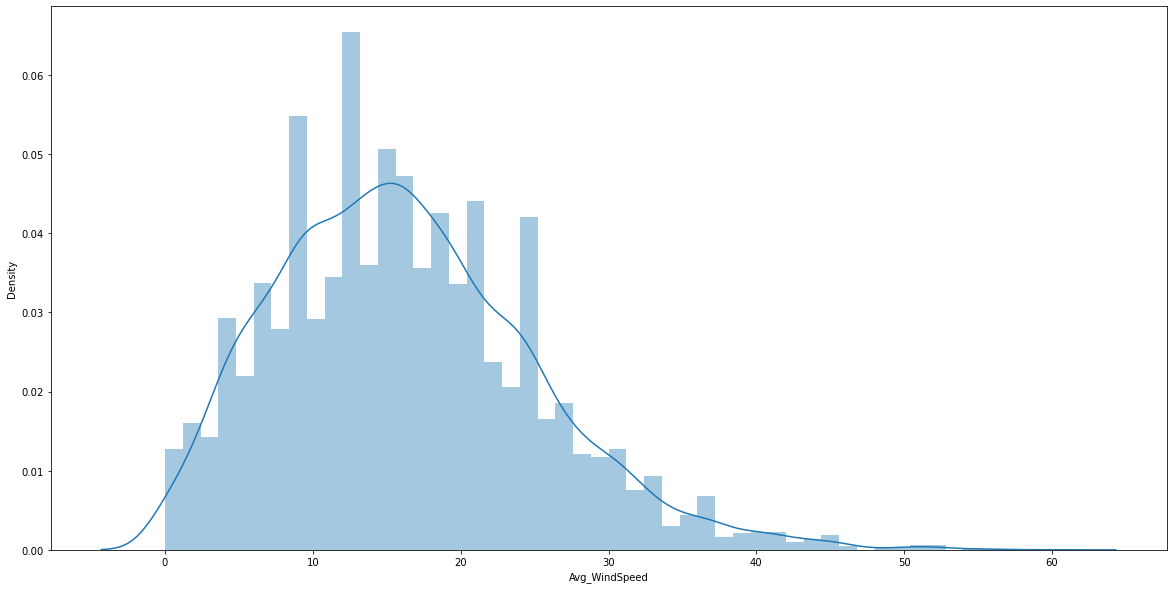

In [53]:
sns.distplot(data['Avg_WindSpeed'])

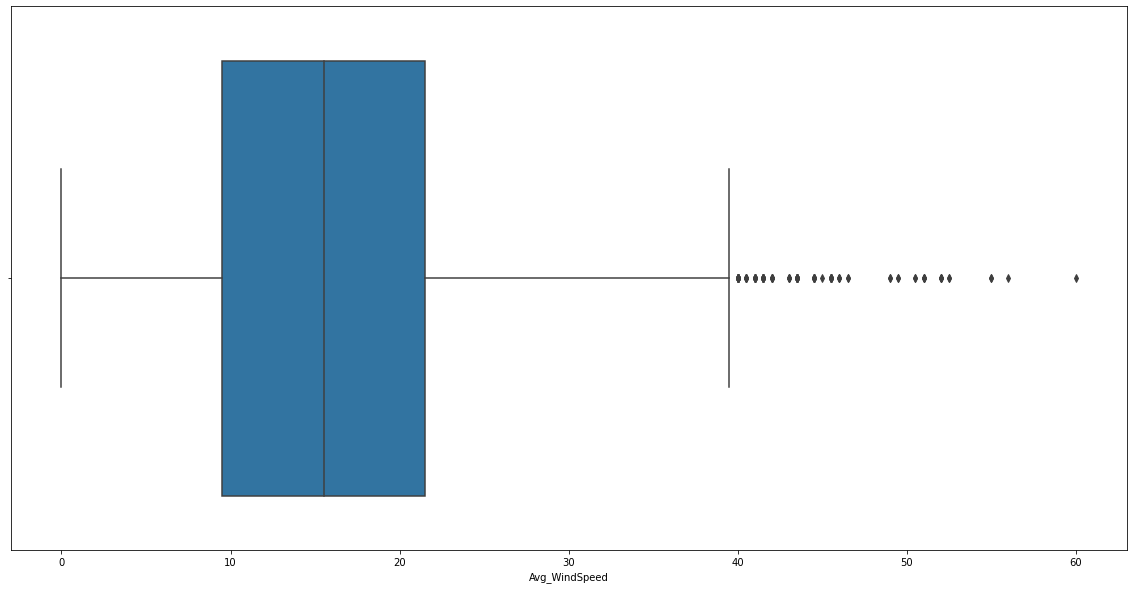

In [54]:
sns.boxplot(x = data['Avg_WindSpeed'])
plt.xlabel("Avg_WindSpeed")
plt.show()

<AxesSubplot:xlabel='Avg_Cloud', ylabel='Density'>

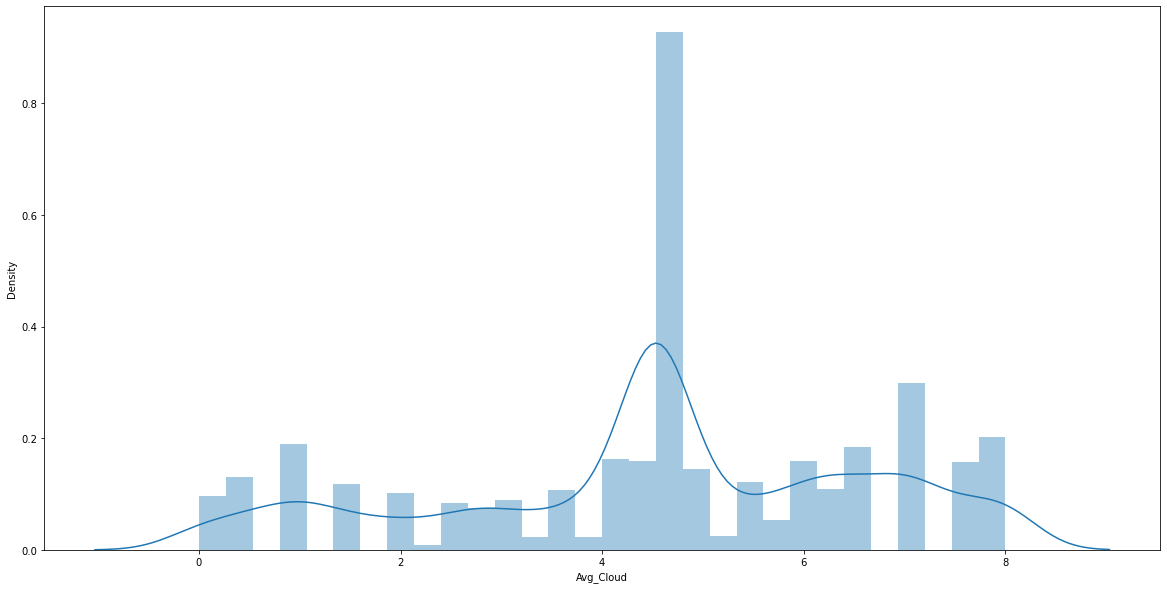

In [55]:
sns.distplot(data['Avg_Cloud'])

<AxesSubplot:ylabel='Density'>

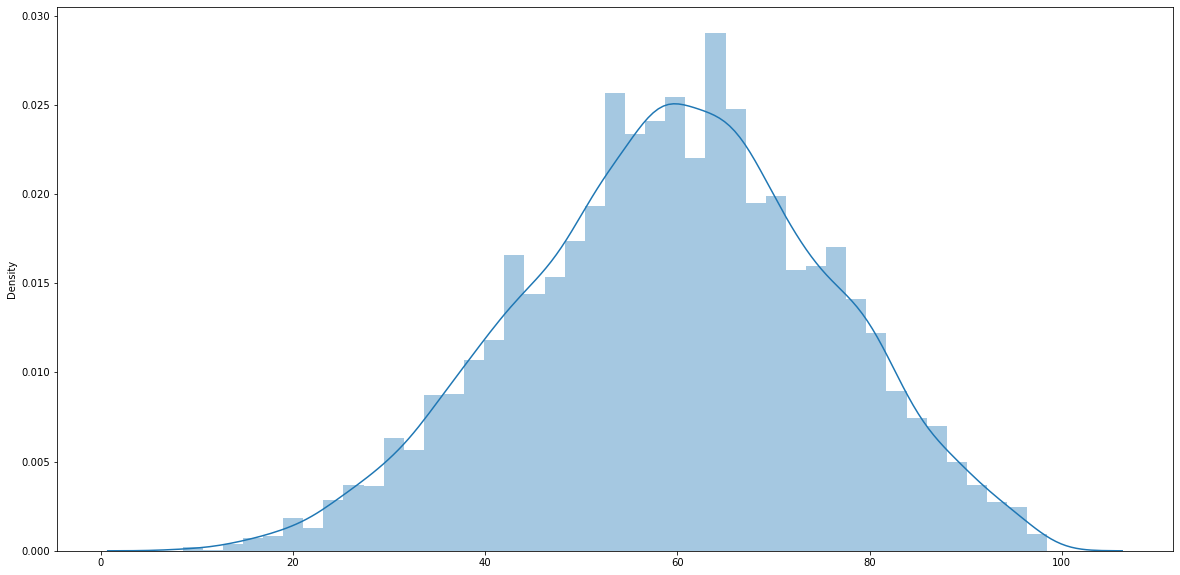

In [56]:
sns.distplot(data[['Avg_Humidity']])

<AxesSubplot:xlabel='Avg_Pressure', ylabel='Density'>

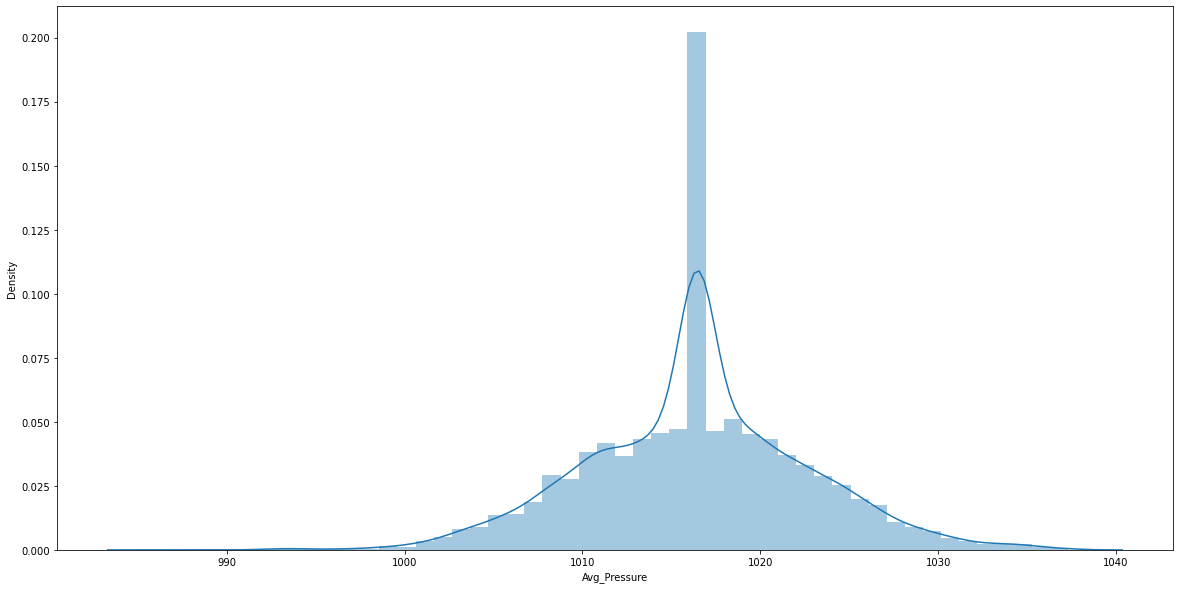

In [57]:
sns.distplot(data['Avg_Pressure'])

<AxesSubplot:xlabel='Avg_Temp', ylabel='Density'>

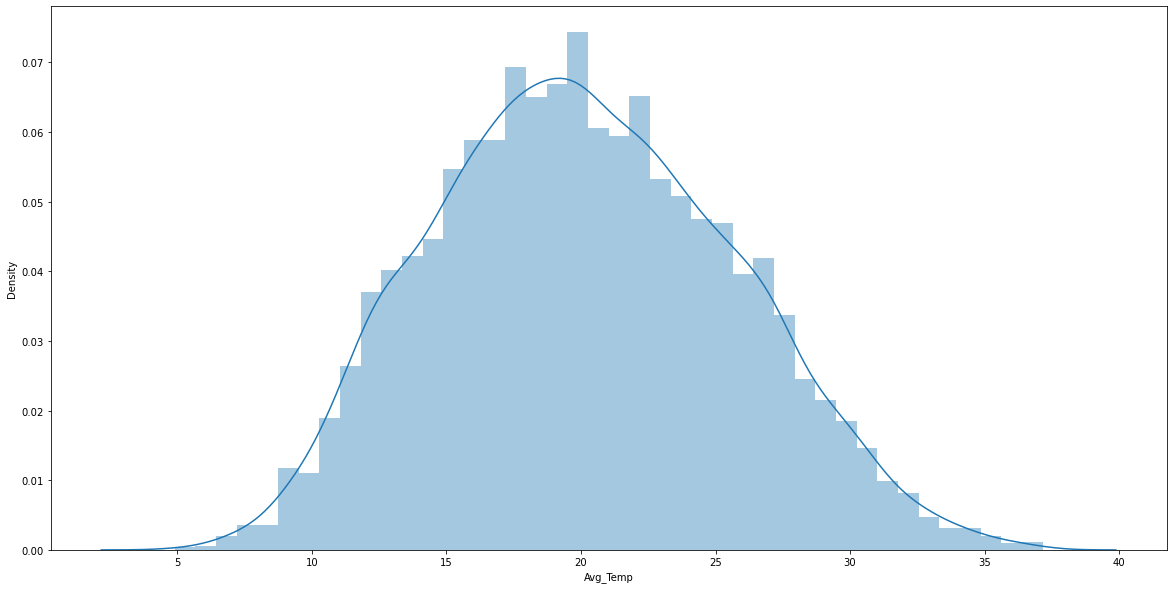

In [58]:
sns.distplot(data['Avg_Temp'])

# **BI-VARIATE DATA ANALYSI**

Text(0.5, 1.0, 'Distribution of Average Wind Speed by Rain Tomorrow')

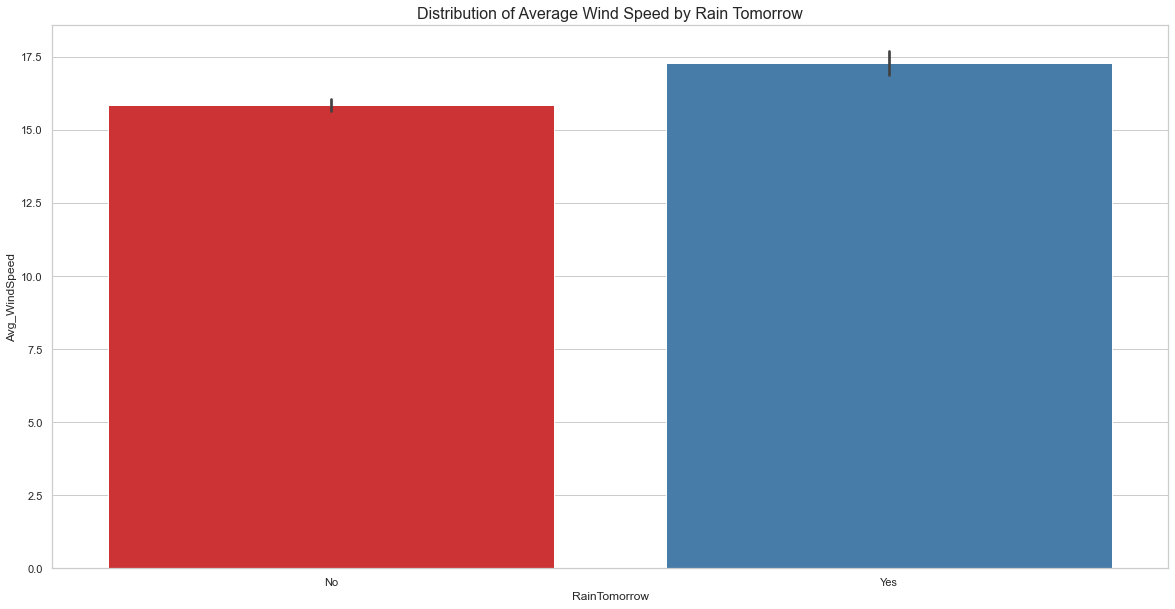

In [59]:
# Visualizing 'Avg_Speed' vs 'RainTomorrow' by using barplot.
sns.set(style="whitegrid")
sns.barplot(x = 'RainTomorrow' , y = 'Avg_WindSpeed' , data = data , palette = 'Set1')
plt.title('Distribution of Average Wind Speed by Rain Tomorrow', fontsize=16)



# # Setting the aesthetic style of the plots
# sns.set(style="whitegrid")

# # Create a boxplot
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='RainTomorrow', y='Avg_WindSpeed', data=data, palette='Set1')

# # Adding titles and labels
# plt.title('Distribution of Average Wind Speed by Rain Tomorrow', fontsize=16)
# plt.xlabel('Rain Tomorrow', fontsize=14)
# plt.ylabel('Average Wind Speed', fontsize=14)

# # Display the plot
# plt.show()


# # Create a violin plot
# plt.figure(figsize=(10, 6))
# sns.violinplot(x='RainTomorrow', y='Avg_WindSpeed', data=data, palette='Set1')

# # Adding titles and labels
# plt.title('Distribution of Average Wind Speed by Rain Tomorrow', fontsize=16)
# plt.xlabel('Rain Tomorrow', fontsize=14)
# plt.ylabel('Average Wind Speed', fontsize=14)

# # Display the plot
# plt.show()

# Create a swarm plot
# plt.figure(figsize=(10, 6))
# sns.swarmplot(x='RainTomorrow', y='Avg_WindSpeed', data=data, palette='Set1')

# # Adding titles and labels
# plt.title('Distribution of Average Wind Speed by Rain Tomorrow', fontsize=16)
# plt.xlabel('Rain Tomorrow', fontsize=14)
# plt.ylabel('Average Wind Speed', fontsize=14)

# # Display the plot
# plt.show()

*Here , we can clearly say that Avg_WindSpeed has maximum rainfall for tomorrow.*

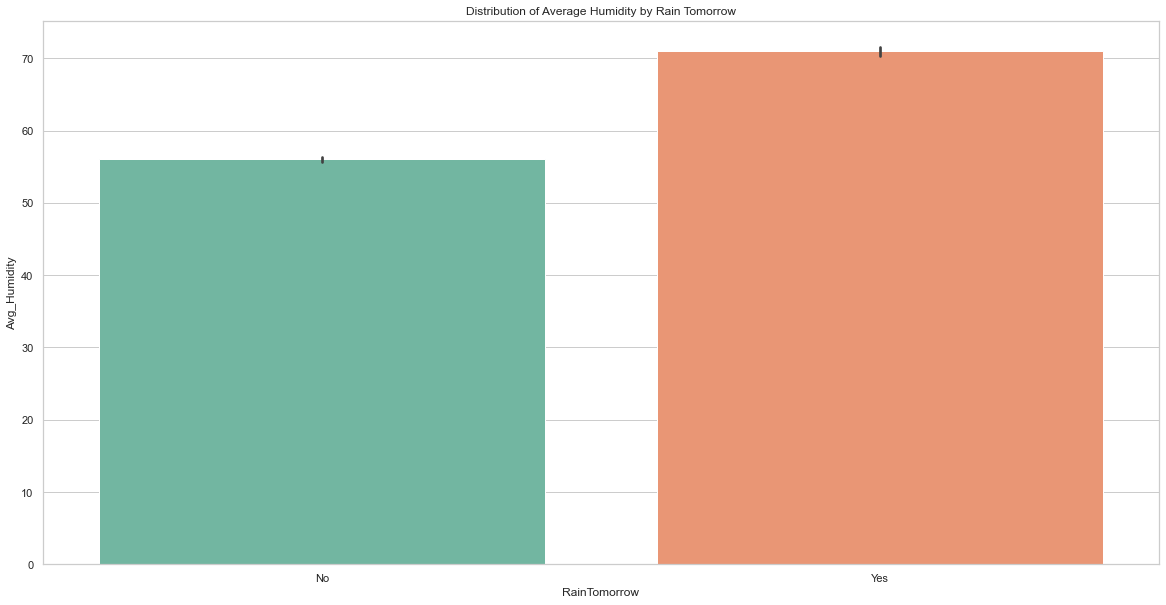

In [60]:
# Visualizing "Avg_Humidity" vs "RainTomorrow" by using BarPlot

sns.set(style = 'whitegrid')
sns.barplot(x = 'RainTomorrow' , y = 'Avg_Humidity' , data = data , palette='Set2')
plt.title("Distribution of Average Humidity by Rain Tomorrow")
plt.show()

*Here , we can see that Avg_Humidity shows maximum rainfall for RainTomorrow. *

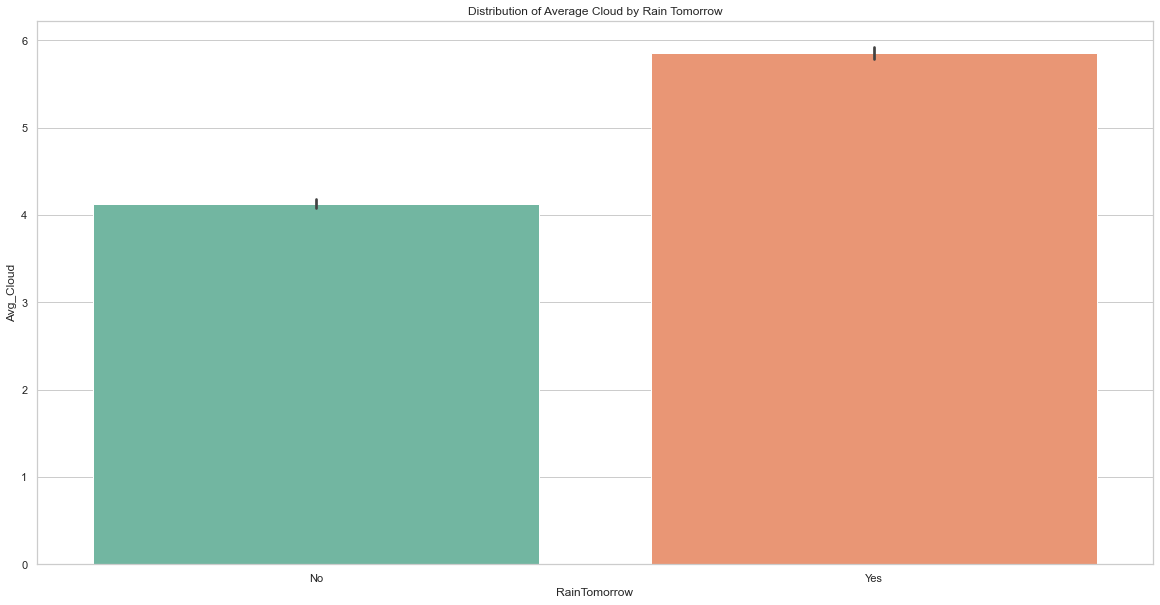

In [61]:
# Visualizing "Avg_Cloud" vs "RainTomorrow" by using BarPlot

sns.set(style = 'whitegrid')
sns.barplot(x = 'RainTomorrow' , y = 'Avg_Cloud' , data = data , palette='Set2')
plt.title("Distribution of Average Cloud by Rain Tomorrow")
plt.show()

*Here , we can see that Avg_Cloud shows maximum rainfall for RainTomorrow. *

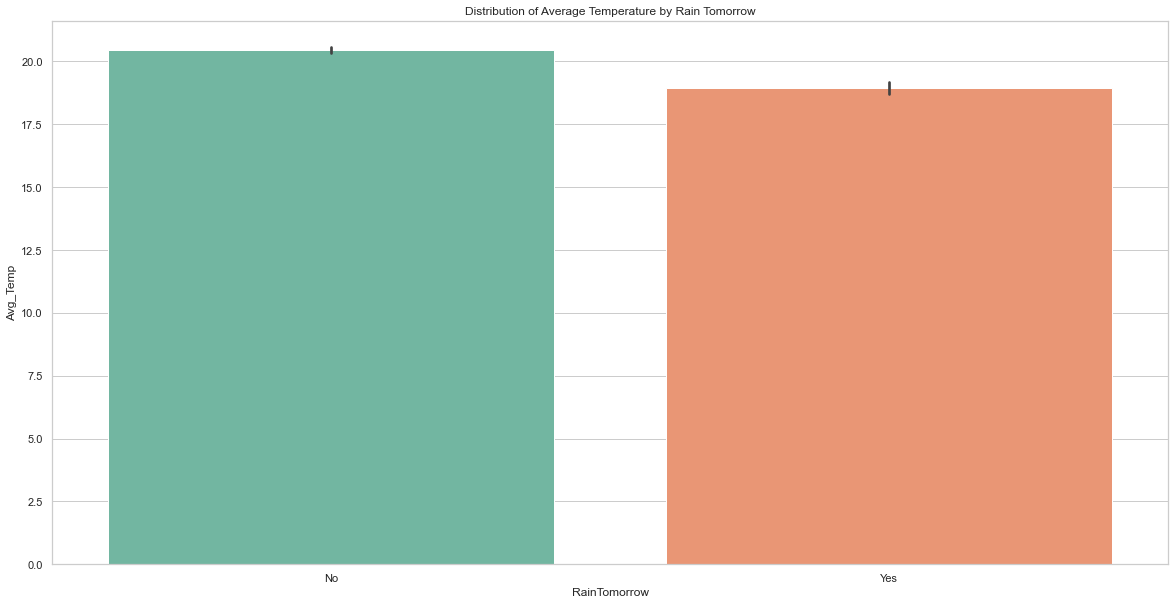

In [62]:
# Visualizing "Ave_Temp" vs "RainTomorrow" column by using BarPlot


sns.set(style = 'whitegrid')
sns.barplot(x = 'RainTomorrow' , y = 'Avg_Temp' , data = data , palette='Set2')
plt.title("Distribution of Average Temperature by Rain Tomorrow")
plt.show()

*Average temperature shows less rainfall for rain Tomorrow.*

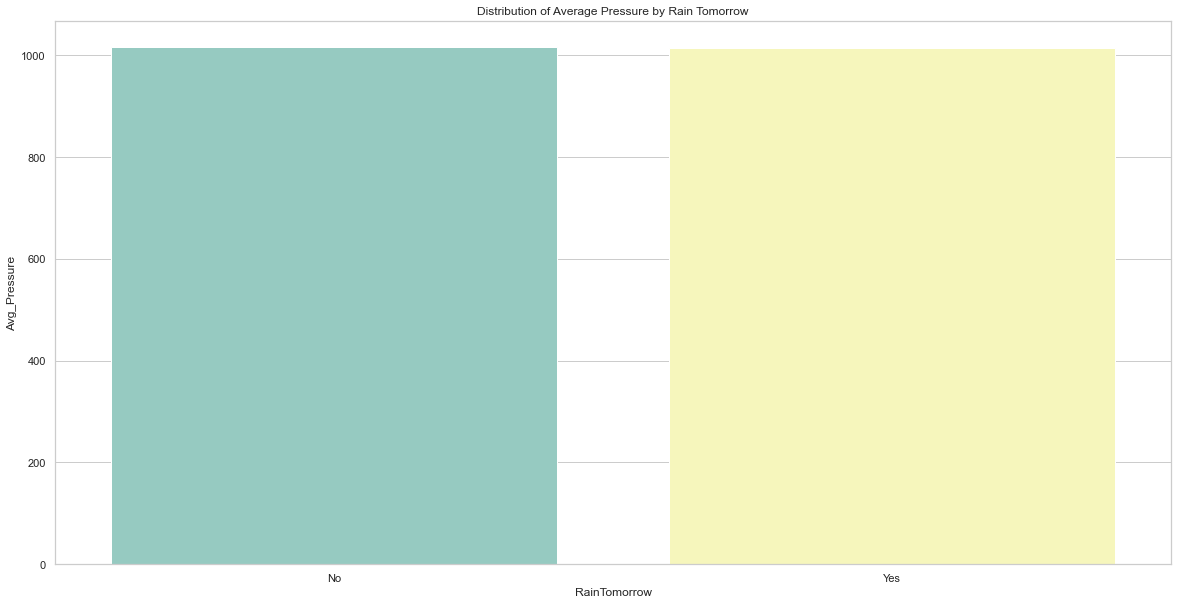

In [63]:
# Visualizing "Avg_Pressure" vs "RainTomorrow" by using BarPlot

sns.set(style = 'whitegrid')
sns.barplot(x = 'RainTomorrow' , y = 'Avg_Pressure' , data = data , palette='Set3')
plt.title("Distribution of Average Pressure by Rain Tomorrow")
plt.show()

*As we can see that Avg_Pressure shows same Rainfall for Rain Tomorrow.*

# **DATA ENCODING**

In [64]:
# Encoding Dataset by using Label Encoder.

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

obj = data.select_dtypes(include = ['object']).columns


In [65]:
for i in obj :
  data[i] = LE.fit_transform(data[i])


In [66]:
data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Day,Month,Year,Avg_WindSpeed,Avg_Humidity,Avg_Cloud,Avg_Temp,Avg_Pressure
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,0,0,1,12,2008,22.0,46.5,6.251591,19.35,1007.40
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,0,0,2,12,2008,13.0,34.5,4.534902,20.75,1009.20
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,0,0,3,12,2008,22.5,34.0,3.283311,22.10,1008.15
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,0,0,4,12,2008,10.0,30.5,4.534902,22.30,1015.20
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,0,0,5,12,2008,13.5,57.5,7.500000,23.75,1008.40


*Categorical Columns have been successfully encoded.*

# *MULTIVARIATE ANALYSIS*

In [ ]:
# By using Pairplot

plt.figure(figsize = (40 , 60))
sns.pairplot(data)
plt.show()

# *Checking for Correlation*

In [ ]:
data.corr()

In [ ]:
#Visualizing correlation using Heatmap

plt.figure(figsize = (15 , 10))
sns.heatmap(data.corr() , annot = True , cmap = 'rocket' , fmt = '0.2f')

*Here Avg_Temp and MinTemp shows Highest correlation of 0.82, Avg_Temp and MaxTemp shows highest correlation of 0.96, also WindGustSpeed and Avg_WindSpeed shows highest correlation of 0.72.*

# *Spliting the Dataset into Feature and target column for "RainTomorrow" for prediction.*

In [ ]:
x = data.drop(['RainTomorrow'] , axis = True)
y = data['RainTomorrow']

In [ ]:
x.shape
y.shape

# *checking for Skewness*

In [ ]:
x.skew().sort_values(ascending = False)

*Here the columns 'Evaporation','Rainfall','RainToday','WindGustSpeed','Avg_WindSpeed' have highest skewness and we will remove it using powertransformation.*

In [ ]:
from sklearn.preprocessing import power_transform

x_1 = power_transform(x)

In [ ]:
pd.DataFrame(x_1 , columns = x.columns).skew().sort_values(ascending = False)

*We have successfully removed the Skewness in the DataSet.*

In [ ]:
# Visualizing the skewness by using distplot in the Dataset.

plt.figure(figsize = (15,10))
plotnumber = 1

for i in x :
  if plotnumber <= 20 :
    ax = plt.subplot(4 , 5 , plotnumber)
    sns.distplot(x[i])
    plt.xlabel(i , fontsize = 20)
  plotnumber += 1
plt.tight_layout()

# Outliers Detection & Handling

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a boxplot for all columns in the dataframe
plt.figure(figsize=(20, 10))
x.iloc[:, :].boxplot()

# Adjust layout to fit the xticks and add some spacing
plt.subplots_adjust(bottom=0.3)

# Rotate xticks for better readability
plt.xticks(rotation=90, fontsize=12)

# Add titles and labels
plt.title('Boxplot of All Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Value', fontsize=14)

# Show the plot
plt.show()


*Here from the above boxplot, 'MaxTemp','Evaporation','Sunshine','WindGustSpeed','RainToday','Avg_WindSpeed','Avg_Humidity','Avg_Temp','Avg_Pressure'shows the outliers*

*We need to remove outliers.*

*We will remove the outliers from each features by using IQR method.*

In [ ]:
# 1st Quantile
q1 = x.quantile(0.25)
# 3rd Quantile
q3 = x.quantile(0.75)

#IQR

iqr = q3 - q1

In [ ]:
iqr

In [ ]:
# Checking the feature Indexes , which is having higher outliers.

Evaporation_out = q3.Evaporation + (1.5 * iqr.Evaporation)
feature1 = np.where(x['Evaporation']> Evaporation_out)
x = x.drop(x['Evaporation'].index[feature1])
y = y.drop(y.index[feature1])



In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

WindGustSpeed_out = q3.WindGustSpeed + (1.5 * iqr.WindGustSpeed)
feature1 = np.where(x['WindGustSpeed']> WindGustSpeed_out)
x = x.drop(x['WindGustSpeed'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_WindSpeed_out = q3.Avg_WindSpeed + (1.5 * iqr.Avg_WindSpeed)
feature1 = np.where(x['Avg_WindSpeed']>Avg_WindSpeed_out )
x = x.drop(x['Avg_WindSpeed'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Pressure_out = q3.Avg_Pressure + (1.5 * iqr.Avg_Pressure)
feature1 = np.where(x['Avg_Pressure']>Avg_Pressure_out )
x = x.drop(x['Avg_Pressure'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

MaxTemp_out = q1.MaxTemp - (1.5 * iqr.MaxTemp)
feature1 = np.where(x['MaxTemp']< MaxTemp_out  )
x = x.drop(x['MaxTemp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Evaporation_low = q1.Evaporation- (1.5 * iqr.Evaporation)
feature1 = np.where(x['Evaporation']< Evaporation_low )
x = x.drop(x['Evaporation'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

WindGustSpeed_low = q1.WindGustSpeed- (1.5 * iqr.WindGustSpeed)
feature1 = np.where(x['WindGustSpeed']< WindGustSpeed_low  )
x = x.drop(x['WindGustSpeed'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Temp_low = q1.Avg_Temp- (1.5 * iqr.Avg_Temp)
feature1 = np.where(x['Avg_Temp']< Avg_Temp_low  )
x = x.drop(x['Avg_Temp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Pressure_low = q1. Avg_Pressure- (1.5 * iqr.Avg_Pressure)
feature1 = np.where(x['Avg_Pressure']<  Avg_Pressure_low  )
x = x.drop(x['Avg_Pressure'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
from scipy.stats import zscore

print("High Outliers present")
print((zscore(x)<3).all())
print("Low Outliers Present")
print((zscore(x)>-3).all())

In [ ]:
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)

iqr = q3 - q1

In [ ]:
MaxTemp_Out = q3.MaxTemp + (1.5*iqr.MaxTemp)
feature1 = np.where(x['MaxTemp']>MaxTemp_Out)
x = x.drop(x['MaxTemp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# # Checking the feature Indexes which have higher outliers.

# MaxTemp_low = q1.MaxTemp - (1.5 * iqr.MaxTemp)
# feature1 = np.where(x['MaxTemp']< MaxTemp_low  )
# x = x.drop(x['MaxTemp'].index[feature1])
# y = y.drop(y.index[feature1])

# print(x.shape)
# print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_RainFall = q1.Rainfall- (1.5 * iqr.Rainfall)
feature1 = np.where(x['Rainfall']< Avg_RainFall )
x = x.drop(x['Rainfall'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

WindSpeed_Out = q1.Avg_WindSpeed- (1.5 * iqr.Avg_WindSpeed)
feature1 = np.where(x['Avg_WindSpeed']< WindSpeed_Out )
x = x.drop(x['Avg_WindSpeed'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Sunshine_Out = q1.Sunshine- (1.5 * iqr.Sunshine)
feature1 = np.where(x['Sunshine']< Sunshine_Out )
x = x.drop(x['Sunshine'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# # Checking the feature Indexes which have higher outliers.

# Avg_Temp_low = q1.Avg_Temp - (1.5 * iqr.Avg_Temp)
# feature1 = np.where(x['Avg_Temp']< Avg_Temp_low)
# x = x.drop(x['Avg_Temp'].index[feature1])
# y = y.drop(y.index[feature1])

# print(x.shape)
# print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Humidity_low = q1.Avg_Humidity- (1.5 * iqr.Avg_Humidity)
feature1 = np.where(x['Avg_Humidity']< Avg_Humidity_low )
x = x.drop(x['Avg_Humidity'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
# Checking the feature Indexes which have higher outliers.

Avg_Temp_Out = q1.Avg_Temp- (1.5 * iqr.Avg_Temp)
feature1 = np.where(x['Avg_Temp']< Avg_Temp_Out )
x = x.drop(x['Avg_Temp'].index[feature1])
y = y.drop(y.index[feature1])

print(x.shape)
print(y.shape)

In [ ]:
from scipy.stats import zscore
print('High Outliers present')
print((zscore(x)<3).all())
print('Low Outliers Present')
print((zscore(x)>-3).all())